<a href="https://colab.research.google.com/github/LucaB999/Cats-vs-Dogs-Images-Classification/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import dataset

In [1]:
!wget https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download

--2023-03-24 15:11:17--  https://unimibox.unimi.it/index.php/s/eNGYGSYmqynNMqF/download
Resolving unimibox.unimi.it (unimibox.unimi.it)... 159.149.53.190
Connecting to unimibox.unimi.it (unimibox.unimi.it)|159.149.53.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘download’

download                [        <=>         ] 812.79M   890KB/s    in 4m 10s  

2023-03-24 15:15:29 (3.25 MB/s) - ‘download’ saved [852272294]



# Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from os.path import isfile, join
import pandas as pd
from PIL import Image
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import statistics as st
from tensorflow.python.keras import regularizers

# Unzip dataset

In [ ]:
!unzip download

In [4]:
print("Cats photos :" +str(len(os.listdir('/content/CatsDogs/Cats'))))
print("Dogs photos :" +str(len(os.listdir('/content/CatsDogs/Dogs'))))

Cats photos :12500
Dogs photos :12500


#Transform to grayscale

In [5]:
path = "/content/CatsDogs/Cats"

counter = 0
failed_count = 0
for img in os.listdir(path):  # iterate over each image per cats
    img_path = os.path.join(path, img)
    try:
        img_grayscale = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        cv2.imwrite(img_path, img_grayscale)
        counter += 1
    except Exception as e:
        failed_count += 1
        os.remove(img_path)
        print(f"Could not convert image {img} and removed: {e}")
        
print(f"Total images processed: {counter}")
print(f"Failed to convert and removed: {failed_count}")

Could not convert image 10820.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 850.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 11210.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 9171.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 10404.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 10501.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.

In [6]:
path = "/content/CatsDogs/Dogs"

counter = 0
failed_count = 0
for img in os.listdir(path):  # iterate over each image per dogs 
    img_path = os.path.join(path, img)
    try:
        img_grayscale = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        cv2.imwrite(img_path, img_grayscale)
        counter += 1
    except Exception as e:
        failed_count += 1
        os.remove(img_path)
        print(f"Could not convert image {img} and removed: {e}")
        
print(f"Total images processed: {counter}")
print(f"Failed to convert and removed: {failed_count}")

Could not convert image 11849.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 6059.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 11702.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 11675.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 10797.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave.cpp:783: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

Could not convert image 3136.jpg and removed: OpenCV(4.7.0) /io/opencv/modules/imgcodecs/src/loadsave

In [7]:
print("Cats photos :" +str(len(os.listdir('/content/CatsDogs/Cats'))))
print("Dogs photos :" +str(len(os.listdir('/content/CatsDogs/Dogs'))))

Cats photos :12476
Dogs photos :12470


# Create the dataframe

In [8]:
input_path = []
label = []

for class_name in os.listdir("CatsDogs"):
  for path in os.listdir("CatsDogs/"+ class_name):
    if class_name == 'Cats':
      label.append("cat")
    else:
      label.append("dog")
    input_path.append(os.path.join("CatsDogs", class_name, path))

In [9]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label

df.head()

,images,label
0,CatsDogs/Dogs/9835.jpg,dog
1,CatsDogs/Dogs/1141.jpg,dog
2,CatsDogs/Dogs/1272.jpg,dog
3,CatsDogs/Dogs/4457.jpg,dog
4,CatsDogs/Dogs/4022.jpg,dog


#Define image properties

In [10]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=1

#Split data

In [11]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state = 35)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state = 35)

#Data generators

In [12]:
image_data_generator = ImageDataGenerator(rescale=1./255)

In [13]:
test_generator=image_data_generator.flow_from_dataframe(dataframe = test_df, 
                                                        directory=None,
                                                        x_col="images", y_col="label",
                                                        batch_size=32, seed = 87,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Image_Size,
                                                        color_mode = "grayscale")
                                                            

train_generator = image_data_generator.flow_from_dataframe(dataframe=train_df, 
                                                          directory=None, 
                                                          x_col="images", y_col="label",
                                                          batch_size=32, seed = 87,
                                                          shuffle=True, class_mode="categorical", 
                                                          target_size= Image_Size,
                                                          color_mode = "grayscale")
                                                              

valid_generator = image_data_generator.flow_from_dataframe(dataframe= val_df, 
                                                          directory=None, 
                                                          x_col="images", y_col="label",
                                                          batch_size=32, seed = 87,
                                                          shuffle=True, class_mode="categorical", 
                                                          target_size=Image_Size,
                                                          color_mode = "grayscale")

Found 4990 validated image filenames belonging to 2 classes.
Found 14967 validated image filenames belonging to 2 classes.
Found 4989 validated image filenames belonging to 2 classes.


#Model: 3 CL, different number of filters

In [ ]:
def create_model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.2,seed=67))

  model.add(Dense(2,activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

  return model

In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0

In [ ]:
#fit
history = model.fit(train_generator,
                      epochs = 30,
                      validation_data = valid_generator
                      )

Epoch 1/30
468/468 [==============================] - 51s 85ms/step - loss: 0.8195 - accuracy: 0.6001 - val_loss: 0.7105 - val_accuracy: 0.5065
Epoch 2/30
468/468 [==============================] - 41s 88ms/step - loss: 0.6274 - accuracy: 0.6788 - val_loss: 0.5981 - val_accuracy: 0.7156
Epoch 3/30
468/468 [==============================] - 39s 83ms/step - loss: 0.5870 - accuracy: 0.7271 - val_loss: 0.6083 - val_accuracy: 0.6905
Epoch 4/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5569 - accuracy: 0.7474 - val_loss: 0.5731 - val_accuracy: 0.7248
Epoch 5/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5400 - accuracy: 0.7603 - val_loss: 0.5540 - val_accuracy: 0.7531
Epoch 6/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5194 - accuracy: 0.7758 - val_loss: 0.6021 - val_accuracy: 0.7048
Epoch 7/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5004 - accuracy: 0.7928 - val_loss: 0.6630 - val_accuracy:

Text(0.5, 1.0, 'Model: Training vs Validation Accuracy')

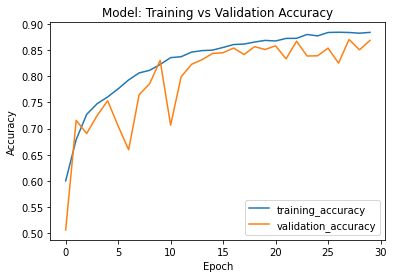

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model: Training vs Validation Accuracy")

Text(0.5, 1.0, 'Model: Training vs Validation Loss')

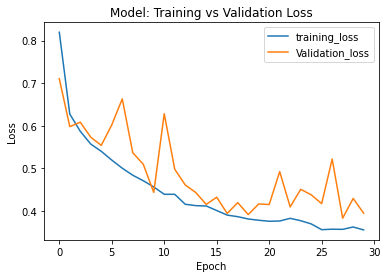

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model: Training vs Validation Loss")

In [ ]:
# evaluate
test_loss, test_acc = model.evaluate(test_generator)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

156/156 [==============================] - 10s 63ms/step - loss: 0.3829 - accuracy: 0.8731
Test Loss: 0.3828810155391693
Test Accuracy: 0.8731462955474854


#Model 1: 3 CL, 32 filters

In [ ]:
def create_model_1():
  
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2, seed=67))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed = 67))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Flatten())
  model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.2,seed=67))

  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

  return model

In [ ]:
model_1 = create_model_1()
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_1 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)      

In [ ]:
history = model_1.fit(train_generator,
                      epochs = 30,
                      validation_data = valid_generator
                      )

Epoch 1/30
468/468 [==============================] - 43s 86ms/step - loss: 0.8199 - accuracy: 0.6363 - val_loss: 0.6936 - val_accuracy: 0.6695
Epoch 2/30
468/468 [==============================] - 39s 83ms/step - loss: 0.6091 - accuracy: 0.7130 - val_loss: 0.5951 - val_accuracy: 0.7292
Epoch 3/30
468/468 [==============================] - 39s 83ms/step - loss: 0.5704 - accuracy: 0.7468 - val_loss: 0.5593 - val_accuracy: 0.7597
Epoch 4/30
468/468 [==============================] - 39s 83ms/step - loss: 0.5444 - accuracy: 0.7681 - val_loss: 0.5334 - val_accuracy: 0.7673
Epoch 5/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5169 - accuracy: 0.7857 - val_loss: 0.5014 - val_accuracy: 0.8000
Epoch 6/30
468/468 [==============================] - 39s 84ms/step - loss: 0.5061 - accuracy: 0.7905 - val_loss: 0.5372 - val_accuracy: 0.7721
Epoch 7/30
468/468 [==============================] - 39s 83ms/step - loss: 0.4897 - accuracy: 0.8042 - val_loss: 0.5250 - val_accuracy:

Text(0.5, 1.0, 'Model 1: Training vs Validation Accuracy')

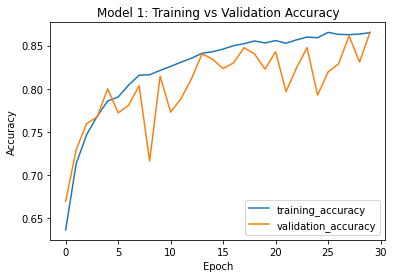

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 1: Training vs Validation Accuracy")

Text(0.5, 1.0, 'Model 1: Training vs Validation Loss')

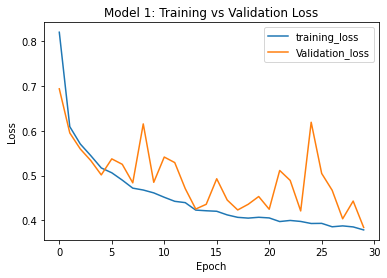

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model 1: Training vs Validation Loss")

In [ ]:
# evaluate
test_loss, test_acc = model_1.evaluate(test_generator)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

156/156 [==============================] - 9s 59ms/step - loss: 0.3726 - accuracy: 0.8747
Test Loss: 0.37255409359931946
Test Accuracy: 0.874749481678009


#Model 2: 3 CL, 64 filters

In [ ]:
def create_model_2():
  model = Sequential()

  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Flatten())
  model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.2,seed=67))

  model.add(Dense(2, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

  return model

In [ ]:
model_2 = create_model_2()
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      640       
                                                                 
 batch_normalization_2 (Batc  (None, 126, 126, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)      

In [ ]:
#fit
history = model_2.fit(train_generator,
                      epochs = 30,
                      validation_data = valid_generator
                      )

Epoch 1/30
468/468 [==============================] - 45s 91ms/step - loss: 0.8149 - accuracy: 0.6131 - val_loss: 0.7048 - val_accuracy: 0.5582
Epoch 2/30
468/468 [==============================] - 41s 87ms/step - loss: 0.6468 - accuracy: 0.6674 - val_loss: 0.6381 - val_accuracy: 0.6827
Epoch 3/30
468/468 [==============================] - 41s 87ms/step - loss: 0.6168 - accuracy: 0.7060 - val_loss: 0.5678 - val_accuracy: 0.7460
Epoch 4/30
468/468 [==============================] - 43s 92ms/step - loss: 0.5732 - accuracy: 0.7458 - val_loss: 0.5905 - val_accuracy: 0.7334
Epoch 5/30
468/468 [==============================] - 41s 87ms/step - loss: 0.5492 - accuracy: 0.7693 - val_loss: 0.5734 - val_accuracy: 0.7609
Epoch 6/30
468/468 [==============================] - 41s 87ms/step - loss: 0.5299 - accuracy: 0.7841 - val_loss: 0.5200 - val_accuracy: 0.7857
Epoch 7/30
468/468 [==============================] - 41s 88ms/step - loss: 0.4993 - accuracy: 0.8048 - val_loss: 0.5003 - val_accuracy:

Text(0.5, 1.0, 'Model 2: Training vs Validation Accuracy')

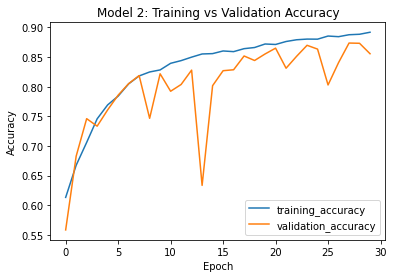

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 2: Training vs Validation Accuracy")

Text(0.5, 1.0, 'Model 2: Training vs Validation Loss')

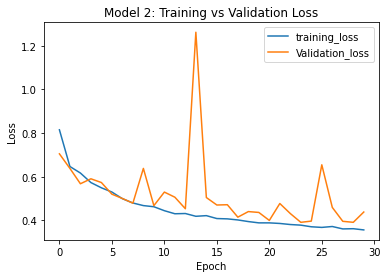

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model 2: Training vs Validation Loss")

In [ ]:
# evaluate
test_loss, test_acc = model_2.evaluate(test_generator)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

156/156 [==============================] - 9s 59ms/step - loss: 0.4481 - accuracy: 0.8553
Test Loss: 0.44810205698013306
Test Accuracy: 0.8553106188774109


#Model 3: 4 CL, 32 filters

In [14]:
def create_model_3():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(Image_Width, Image_Height, Image_Channels)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2,seed=67))

  model.add(Flatten())
  model.add(Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01)))
  model.add(Dropout(0.2,seed=67))

  model.add(Dense(2,activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

  return model

In [ ]:
model_3 = create_model_3()
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 batch_normalization_3 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 30, 30, 32)      

In [ ]:
#fit
history = model_3.fit(train_generator,
                      epochs = 30,
                      validation_data = valid_generator
                      )

Epoch 1/30
468/468 [==============================] - 43s 86ms/step - loss: 0.8396 - accuracy: 0.6152 - val_loss: 0.6875 - val_accuracy: 0.6408
Epoch 2/30
468/468 [==============================] - 38s 81ms/step - loss: 0.6095 - accuracy: 0.6992 - val_loss: 0.6091 - val_accuracy: 0.6985
Epoch 3/30
468/468 [==============================] - 38s 81ms/step - loss: 0.5558 - accuracy: 0.7418 - val_loss: 0.6198 - val_accuracy: 0.6889
Epoch 4/30
468/468 [==============================] - 38s 82ms/step - loss: 0.5127 - accuracy: 0.7723 - val_loss: 0.5411 - val_accuracy: 0.7462
Epoch 5/30
468/468 [==============================] - 38s 81ms/step - loss: 0.4764 - accuracy: 0.7956 - val_loss: 0.4358 - val_accuracy: 0.8142
Epoch 6/30
468/468 [==============================] - 38s 81ms/step - loss: 0.4587 - accuracy: 0.8022 - val_loss: 0.4154 - val_accuracy: 0.8234
Epoch 7/30
468/468 [==============================] - 38s 81ms/step - loss: 0.4251 - accuracy: 0.8224 - val_loss: 0.4247 - val_accuracy:

Text(0.5, 1.0, 'Model 3: Training vs Validation Accuracy')

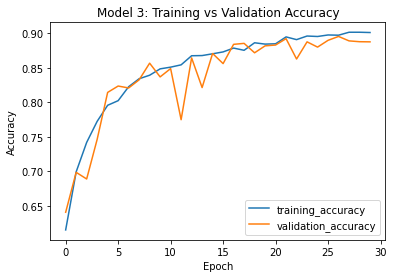

In [ ]:
# Accuracy
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model 3: Training vs Validation Accuracy")

Text(0.5, 1.0, 'Model 3: Training vs Validation Loss')

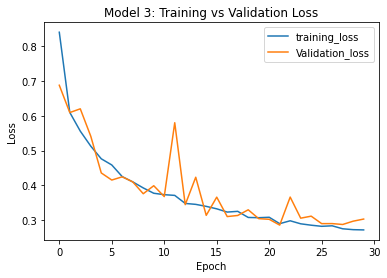

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label = 'Validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model 3: Training vs Validation Loss")

In [ ]:
# evaluate
test_loss, test_acc = model_3.evaluate(test_generator)
print("Test Loss: "+str(test_loss))
print("Test Accuracy: "+str(test_acc))

156/156 [==============================] - 9s 60ms/step - loss: 0.2988 - accuracy: 0.8874
Test Loss: 0.29883256554603577
Test Accuracy: 0.887374758720398


# CV on model 3

Found 4990 validated image filenames belonging to 2 classes.
Found 19956 validated image filenames belonging to 2 classes.
Epoch 1/30
624/624 [==============================] - 54s 68ms/step - loss: 0.7763 - accuracy: 0.6190 - val_loss: 0.6211 - val_accuracy: 0.6952
Epoch 2/30
624/624 [==============================] - 42s 68ms/step - loss: 0.5851 - accuracy: 0.7202 - val_loss: 0.5790 - val_accuracy: 0.7255
Epoch 3/30
624/624 [==============================] - 42s 67ms/step - loss: 0.5247 - accuracy: 0.7647 - val_loss: 0.4883 - val_accuracy: 0.7850
Epoch 4/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4754 - accuracy: 0.7975 - val_loss: 0.4418 - val_accuracy: 0.8174
Epoch 5/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4415 - accuracy: 0.8162 - val_loss: 0.5678 - val_accuracy: 0.7244
Epoch 6/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4212 - accuracy: 0.8289 - val_loss: 0.9015 - val_accuracy: 0.6058
Epoch 7/30
62

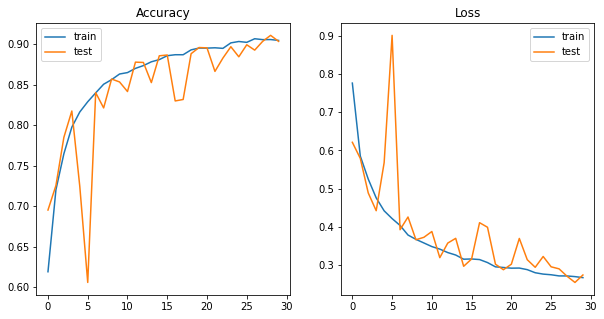

156/156 [==============================] - 9s 55ms/step - loss: 0.2733 - accuracy: 0.9034
Fold 1: accuracy=0.9034067988395691, loss=0.27328458428382874
Found 4989 validated image filenames belonging to 2 classes.
Found 19957 validated image filenames belonging to 2 classes.
Epoch 1/30
624/624 [==============================] - 45s 68ms/step - loss: 0.7659 - accuracy: 0.6230 - val_loss: 0.6017 - val_accuracy: 0.7304
Epoch 2/30
624/624 [==============================] - 42s 68ms/step - loss: 0.5744 - accuracy: 0.7247 - val_loss: 0.5008 - val_accuracy: 0.7891
Epoch 3/30
624/624 [==============================] - 43s 68ms/step - loss: 0.5218 - accuracy: 0.7658 - val_loss: 0.4761 - val_accuracy: 0.7921
Epoch 4/30
624/624 [==============================] - 43s 68ms/step - loss: 0.4806 - accuracy: 0.7933 - val_loss: 0.4702 - val_accuracy: 0.8082
Epoch 5/30
624/624 [==============================] - 43s 68ms/step - loss: 0.4485 - accuracy: 0.8106 - val_loss: 0.3829 - val_accuracy: 0.8408
Epoch

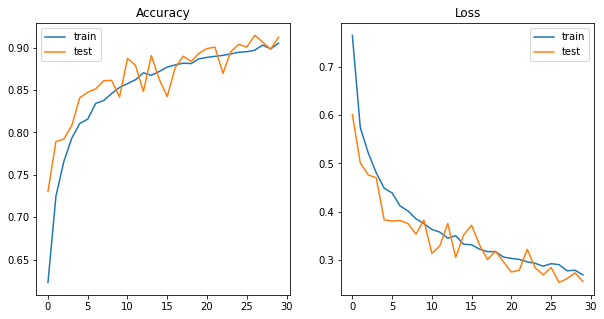

156/156 [==============================] - 9s 55ms/step - loss: 0.2550 - accuracy: 0.9122
Fold 2: accuracy=0.9122068285942078, loss=0.25501954555511475
Found 4989 validated image filenames belonging to 2 classes.
Found 19957 validated image filenames belonging to 2 classes.
Epoch 1/30
624/624 [==============================] - 45s 69ms/step - loss: 0.7409 - accuracy: 0.6197 - val_loss: 0.6267 - val_accuracy: 0.6969
Epoch 2/30
624/624 [==============================] - 43s 68ms/step - loss: 0.5717 - accuracy: 0.7235 - val_loss: 0.5676 - val_accuracy: 0.7284
Epoch 3/30
624/624 [==============================] - 42s 68ms/step - loss: 0.5177 - accuracy: 0.7650 - val_loss: 0.5999 - val_accuracy: 0.7021
Epoch 4/30
624/624 [==============================] - 42s 68ms/step - loss: 0.4744 - accuracy: 0.7972 - val_loss: 0.6244 - val_accuracy: 0.6582
Epoch 5/30
624/624 [==============================] - 42s 68ms/step - loss: 0.4480 - accuracy: 0.8122 - val_loss: 0.4195 - val_accuracy: 0.8212
Epoch

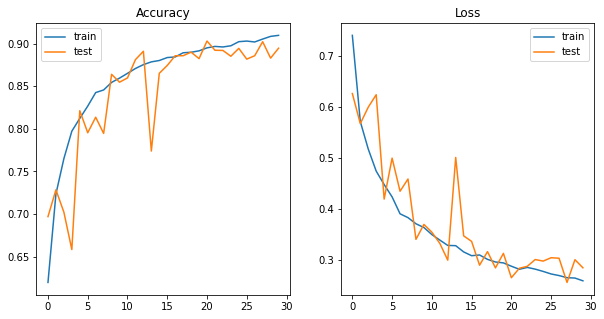

156/156 [==============================] - 8s 54ms/step - loss: 0.2845 - accuracy: 0.8946
Fold 3: accuracy=0.8945680260658264, loss=0.2845394015312195
Found 4989 validated image filenames belonging to 2 classes.
Found 19957 validated image filenames belonging to 2 classes.
Epoch 1/30
624/624 [==============================] - 44s 67ms/step - loss: 0.7766 - accuracy: 0.6218 - val_loss: 0.6456 - val_accuracy: 0.6769
Epoch 2/30
624/624 [==============================] - 42s 67ms/step - loss: 0.5911 - accuracy: 0.7087 - val_loss: 0.5737 - val_accuracy: 0.7374
Epoch 3/30
624/624 [==============================] - 42s 67ms/step - loss: 0.5181 - accuracy: 0.7695 - val_loss: 0.4842 - val_accuracy: 0.7935
Epoch 4/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4810 - accuracy: 0.7985 - val_loss: 0.4802 - val_accuracy: 0.7980
Epoch 5/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4512 - accuracy: 0.8159 - val_loss: 0.5382 - val_accuracy: 0.7416
Epoch 

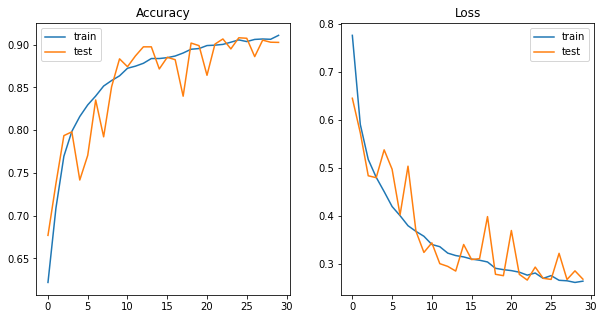

156/156 [==============================] - 9s 54ms/step - loss: 0.2689 - accuracy: 0.9026
Fold 4: accuracy=0.9025856852531433, loss=0.2688668370246887
Found 4989 validated image filenames belonging to 2 classes.
Found 19957 validated image filenames belonging to 2 classes.
Epoch 1/30
624/624 [==============================] - 45s 68ms/step - loss: 0.8024 - accuracy: 0.6183 - val_loss: 0.6984 - val_accuracy: 0.5739
Epoch 2/30
624/624 [==============================] - 42s 67ms/step - loss: 0.6009 - accuracy: 0.7008 - val_loss: 0.6471 - val_accuracy: 0.6522
Epoch 3/30
624/624 [==============================] - 42s 67ms/step - loss: 0.5363 - accuracy: 0.7554 - val_loss: 0.5227 - val_accuracy: 0.7531
Epoch 4/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4770 - accuracy: 0.7930 - val_loss: 0.4677 - val_accuracy: 0.8102
Epoch 5/30
624/624 [==============================] - 42s 67ms/step - loss: 0.4424 - accuracy: 0.8147 - val_loss: 0.4060 - val_accuracy: 0.8346
Epoch 

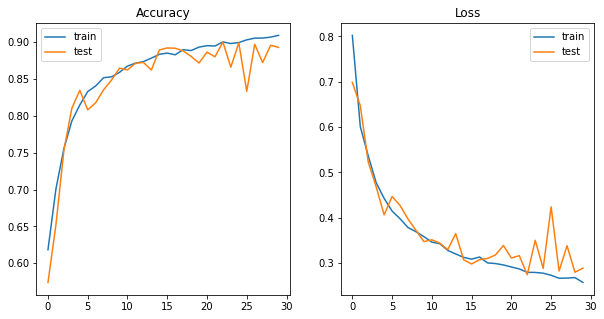

156/156 [==============================] - 8s 53ms/step - loss: 0.2884 - accuracy: 0.8930
Fold 5: accuracy=0.8929645419120789, loss=0.2884221374988556
Average test accuracy: 0.9011463761329651
Average test loss: 0.27402650117874144


In [15]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

test_accuracy = []
test_loss = []

for fold, (train_index, test_index) in enumerate(kfold.split(df)):
    train_data = df.iloc[train_index]
    test_data = df.iloc[test_index]
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    image_data_generator = ImageDataGenerator(rescale=1./255)
    test_generator=image_data_generator.flow_from_dataframe(dataframe = test_data, 
                                                        directory=None,
                                                        x_col="images", y_col="label",
                                                        batch_size=32,  seed = 13,
                                                        shuffle=True, class_mode="categorical",
                                                        target_size=Image_Size,
                                                        color_mode = "grayscale")
                                                            

    train_generator = image_data_generator.flow_from_dataframe(dataframe=train_data, 
                                                              directory=None, 
                                                              x_col="images", y_col="label",
                                                              batch_size=32, seed = 13,
                                                              shuffle=True, class_mode="categorical", 
                                                              target_size= Image_Size,
                                                              color_mode = "grayscale")

    model_CV = create_model_3()
    model_CV.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

    

    history = model_CV.fit(
        train_generator,
        validation_data=test_generator,
        epochs=30
        )

    # plot accuracy and loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.title('Loss')
    plt.legend()

    plt.show()
   
    # Compute test accuracy and loss
    results = model_CV.evaluate(test_generator)
    test_accuracy.append(results[1])
    test_loss.append(results[0])

    print(f"Fold {fold+1}: accuracy={results[1]}, loss={results[0]}")

    tf.keras.backend.clear_session()

# Print overall results
print(f"Average test accuracy: {np.mean(test_accuracy)}")
print(f"Average test loss: {np.mean(test_loss)}")